# **Practica 3.1 Segmentación**

Una empresa desea optimizar sus estrategias de marketing y ventas en función del comportamiento de sus clientes. El objetivo de este análisis es utilizar algoritmos de segmentación para agrupar a los clientes en segmentos basados en sus características demográficas y patrones de compra, así cómo conocer el estado y comportamiento de compras por sectores de productos.
Esto permitirá a la empresa:

* Personalizar las estrategias de marketing para cada segmento, ofreciendo productos y promociones más relevantes.
* Identificar nuevas oportunidades de negocio, como el desarrollo de nuevos productos o la expansión a nuevos mercados.
* Mejorar la experiencia del cliente, ofreciendo un servicio más personalizado y adaptado a sus necesidades.

## Preparación del ambiente

Se importan las librerias

In [517]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

Se carga y explora el archivo como DataFrame

In [466]:
#Carga del dataframe
df = pd.read_csv('data/sales-transactions.csv', encoding='latin-1')

#Tamaño del dataset
print(df.shape)

# Información básica sobre los datos
print("\n")
df.info()
print("\n")
# Estadísticas descriptivas de los datos
df.describe()

(58903, 32)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58903 entries, 0 to 58902
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector         58903 non-null  object 
 1   Tipo           58903 non-null  object 
 2   Linea          58903 non-null  object 
 3   Sublinea       58903 non-null  object 
 4   Presentacion   58903 non-null  object 
 5   Gramaje        58903 non-null  float64
 6   Empresa        58903 non-null  object 
 7   Año            58903 non-null  int64  
 8   Fecha          58903 non-null  object 
 9   Cliente        58903 non-null  object 
 10  Transaccion    58903 non-null  int64  
 11  Pedido         58903 non-null  int64  
 12  Control        58903 non-null  int64  
 13  Producto       58903 non-null  int64  
 14  Descripcion    58903 non-null  object 
 15  Unidad         58903 non-null  object 
 16  Cantidad       58903 non-null  int64  
 17  Precio         58903 non-null  float

,Gramaje,Año,Transaccion,Pedido,Control,Producto,Cantidad,Precio,Precio_Max,Dif_PrecioMax,Importe,Clave_Cliente,No._Hijos,Antiguedad,Edad
count,58903.000000,58903.000000,58903.000000,58903.000000,5.890300e+04,5.890300e+04,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000,58903.000000
mean,0.422715,2015.094715,566993.296182,95670.198224,1.815129e+06,1.815129e+06,1.687656,40.852449,47.909220,7.056769,63.332720,159770.425140,0.471266,8.516663,37.206271
std,0.523643,0.810848,13311.308168,13436.469024,1.111146e+07,1.111146e+07,2.181921,141.596259,154.455908,43.412498,373.341029,33553.013866,0.982056,5.822291,7.681939
min,0.030000,2014.000000,542421.000000,70855.000000,1.200000e+01,1.200000e+01,1.000000,2.200000,2.500000,0.000000,2.400000,100167.000000,0.000000,0.000000,23.000000
25%,0.200000,2014.000000,555513.000000,84080.000000,8.050000e+02,8.050000e+02,1.000000,15.500000,17.500000,0.000000,20.000000,128760.000000,0.000000,5.000000,31.000000
50%,0.300000,2015.000000,567352.000000,96128.000000,7.446000e+03,7.446000e+03,1.000000,28.000000,31.000000,1.300000,33.000000,160551.000000,0.000000,7.000000,37.000000
75%,0.450000,2016.000000,579254.000000,108005.000000,9.008000e+03,9.008000e+03,2.000000,38.000000,42.500000,4.000000,48.000000,187280.000000,0.000000,11.000000,42.000000
max,15.800000,2016.000000,588519.000000,117442.000000,7.009002e+07,7.009002e+07,165.000000,6000.000000,6000.000000,800.000000,38500.000000,230503.000000,8.000000,38.000000,63.000000


In [467]:
df.head()

,Sector,Tipo,Linea,Sublinea,Presentacion,Gramaje,Empresa,Año,Fecha,Cliente,...,No._Hijos,Antiguedad,Edad,Edad_Rango,Escolaridad,Estado_Civil,Estado,Sexo,Funcion,Grupo
0,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
1,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
2,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
3,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,17-01-14,149580 ANDRES G,...,0,11,35,30 - 39,Sin asignar,Soltero,Nuevo Leon,Masculino,PROFESIONISTA,EJECUTIVOS
4,BEBIDAS,TIPO OAX,DIVERSOS,ISOTONICAS,INDIVIDUAL,0.6,957936 ALFA TORRE,2014,22-01-14,100861 MARIA DE,...,0,15,41,40 - 49,Sin asignar,Soltero,Nuevo Leon,Femenino,EMPLEADO A,EMPLEADOS


## Visualización de los datos

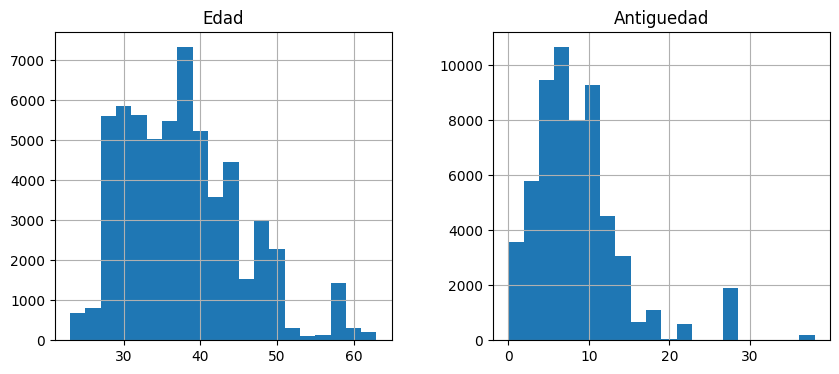

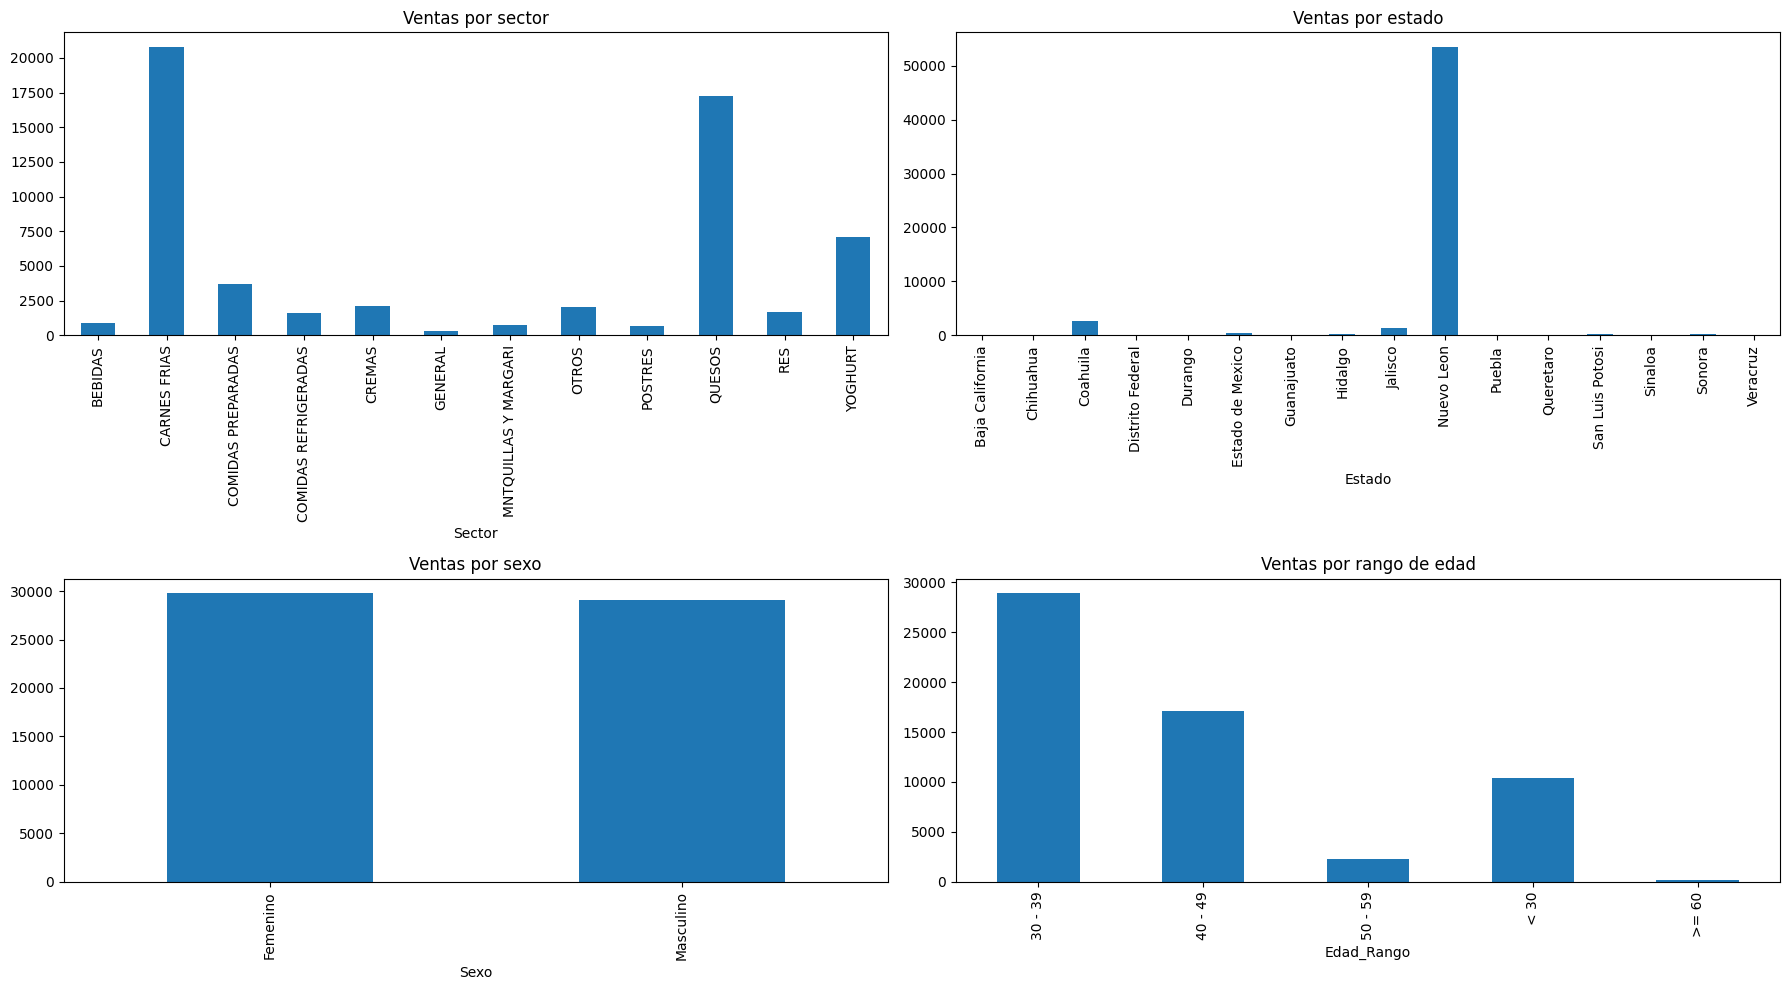

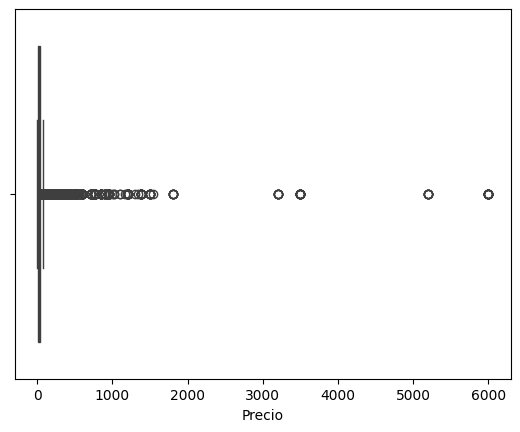

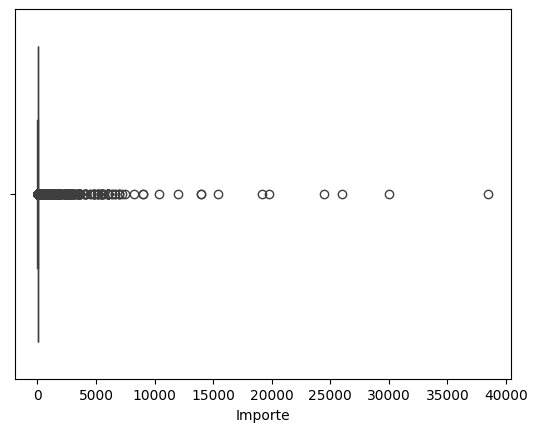

In [468]:
#Histogramas para observar distribución
df[["Edad", "Antiguedad"]].hist(bins=20, figsize=(10, 4))
plt.show()

#Gráficos de barras para variables categoricas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

df.groupby("Sector").size().plot(kind="bar", ax=axes[0, 0], title="Ventas por sector")
df.groupby("Estado").size().plot(kind="bar", ax=axes[0, 1], title="Ventas por estado")
df.groupby("Sexo").size().plot(kind="bar", ax=axes[1, 0], title="Ventas por sexo")
df.groupby("Edad_Rango").size().plot(kind="bar", ax=axes[1, 1], title="Ventas por rango de edad")

# Evitar solapamientos
plt.tight_layout()
plt.show()

#Grafico de lineas para fechas
#df2['Fecha'] = pd.to_datetime(df2['Fecha'], format='mixed')
#df2.groupby(df2['Fecha'].dt.year).size().plot(kind="line", title="Ventas por fecha")
#plt.show()

#BoxPlot para detectar outliers
sns.boxplot(x=df['Precio'])
plt.show()
sns.boxplot(x=df['Importe'])
plt.show()

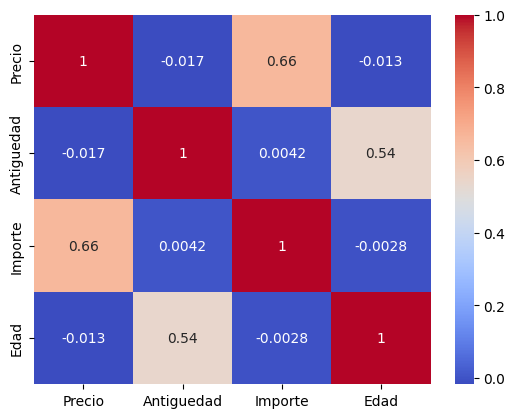

In [469]:
corr_matrix = df[['Precio', 'Antiguedad', 'Importe', 'Edad']].corr()

# Heatmap de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [470]:
sector_importe = df.groupby('Sector')['Importe'].mean()
print(sector_importe)

# Agrupar por 'Edad_Rango' y 'Sexo' para ver la media de 'Cantidad' comprada
transacciones = df.groupby(['Transaccion', 'Edad_Rango', 'Sexo'])['Importe'].sum().reset_index()

# Calcular el importe promedio por transacción por rango de edad y sexo
edad_sexo = transacciones.groupby(['Edad_Rango', 'Sexo'])['Importe'].mean()
print(edad_sexo)

Sector
BEBIDAS                  30.058628
CARNES FRIAS             84.132617
COMIDAS PREPARADAS       62.067577
COMIDAS REFRIGERADAS     41.096130
CREMAS                   12.997164
GENERAL                  26.262411
MNTQUILLAS Y MARGARI     13.295974
OTROS                    70.199766
POSTRES                  28.626093
QUESOS                   66.457239
RES                     101.665575
YOGHURT                  18.994046
Name: Importe, dtype: float64
Edad_Rango  Sexo     
30 - 39     Femenino     313.158376
            Masculino    353.135619
40 - 49     Femenino     292.592805
            Masculino    432.137449
50 - 59     Femenino     438.939354
            Masculino    593.451913
< 30        Femenino     250.460698
            Masculino    286.445920
>= 60       Masculino    468.450370
Name: Importe, dtype: float64


## Desarrollo de Clustering

In [474]:
from dateutil import parser

df['Fecha'] = df['Fecha'].map(lambda x: parser.parse(x, dayfirst=True))

# Extraer año, mes y día de la semana
df['anio'] = df['Fecha'].dt.year
df['mes'] = df['Fecha'].dt.month
df['dia'] = df['Fecha'].dt.weekday

### Situación 1: Segmentación de Clientes por Comportamiento de Compra

Variables: `Sector`, `Presentacion`, `Cantidad`, `Importe`

Objetivo: Identificar segmentos de clientes con patrones similares en sus compras. Esto puede revelar grupos de clientes con comportamientos de compra similares y ayudarte a personalizar estrategias de marketing.

#### Extraer y Agrupar los datos

In [475]:
df_1= df.groupby(['Pedido', 'Sector','Presentacion']).agg({
    'Cantidad': 'sum',
    'Importe': 'sum'
}).reset_index()

In [476]:
df_1.drop(columns=['Pedido'],inplace=True)

In [477]:
df_1_cluster = df_1.copy()

#### Scaler | Encoder

In [478]:
scaler = MinMaxScaler()
df_1_cluster[['Cantidad', 'Importe']] = scaler.fit_transform(df_1[['Cantidad', 'Importe']])

In [479]:
lblencoder = LabelEncoder()
df_1_cluster['Sector'] = lblencoder.fit_transform(df_1['Sector'].values)
df_1_cluster['Presentacion'] = lblencoder.fit_transform(df_1['Presentacion'].values)

#### Elbow

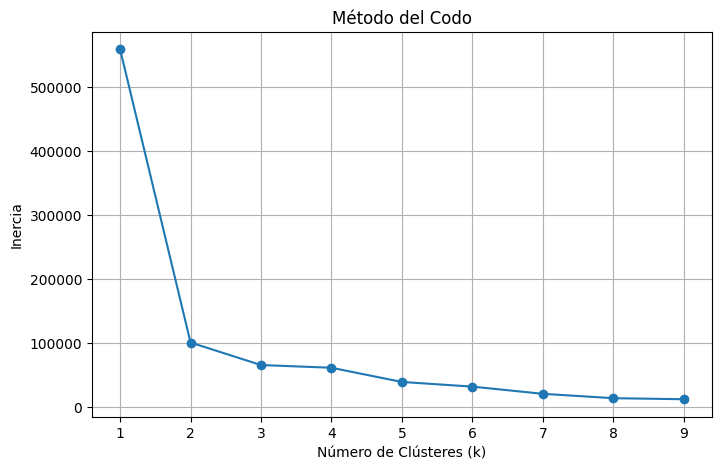

In [480]:
k_range = range(1, 10)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=1)
    kmeans.fit(df_1_cluster)
    inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [518]:
df_1_agglo = df_1_cluster.copy()

#### Clustering - Kmeans

In [482]:
kmeans = KMeans(n_clusters=4).fit(df_1_cluster)

df_1['Cluster'] = kmeans.labels_
df_1_cluster['Cluster'] = kmeans.labels_

#### Reducción de Dimensionalidad

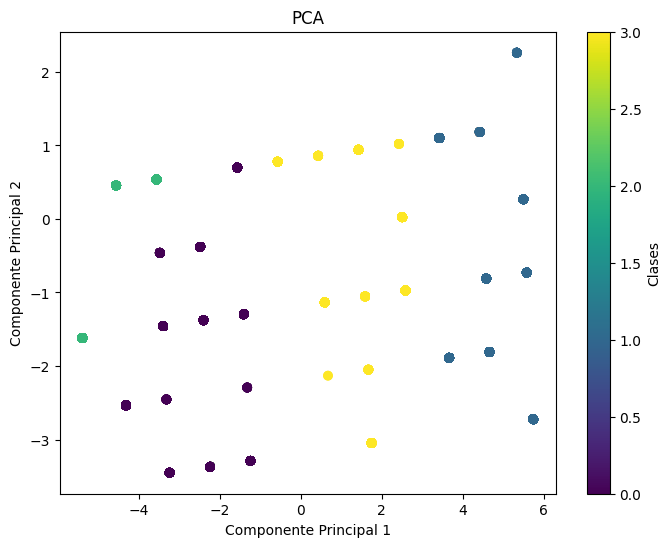

In [483]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_1_cluster.drop(columns='Cluster'))

# Crear un scatter plot de los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_1_cluster['Cluster'], cmap='viridis')

# Añadir leyenda y etiquetas
plt.colorbar(scatter, label='Clases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()

#### Interpretación

In [484]:
impact = pd.DataFrame(pca.components_).T
impact.columns=['Impacto a Comp. 0','Impacto a Comp. 1']

features = pd.DataFrame(pca.feature_names_in_,columns=['Caracteristica'])

pd.concat([features,impact],axis=1)

,Caracteristica,Impacto a Comp. 0,Impacto a Comp. 1
0,Sector,0.996727,0.080830
1,Presentacion,-0.080832,0.996725
2,Cantidad,0.000755,0.002149
3,Importe,-0.000140,-0.000507


Vemos que para el 
* `componente 0`: `sector` impacta en un 0.996727
* `componente 1`: `presentacion` impacta en un 0.996725

In [485]:
cluster_summary = df_1.groupby('Cluster').agg({
    'Cantidad': 'mean',
    'Importe': 'mean',
    'Sector': lambda x: x.mode()[0],
    'Presentacion': lambda x: x.mode()[0]
})
print(cluster_summary)

         Cantidad     Importe        Sector Presentacion
Cluster                                                 
0        1.472713  173.234972        CREMAS   INDIVIDUAL
1        3.682891  106.065627        QUESOS   PAQUETERIA
2        3.012973  110.202615  CARNES FRIAS   PAQUETERIA
3        2.756297   56.310419         OTROS   PAQUETERIA


El análisis del `cluster_summary` muestra la media de `Cantidad`, `Importe` y la moda de `Sector` y `Presentación`para cada clúster:

- Para productos del sector `YOGHURT en presentación INDIVIDUAL`, la cantidad promedio es de 3.87 por venta, con un importe promedio de 74.44, lo que sugiere ventas frecuentes de yogures en porciones individuales a un precio relativamente bajo.

- Los productos del sector `QUESOS en presentación PAQUETERIA` tienen una cantidad promedio de 3.37 por venta y un importe de 108.97, indicando que los quesos, aunque se vendan en paquetes, tienen un precio moderado por transacción.

- Las `CARNES FRIAS en presentación PAQUETERIA` muestran una cantidad promedio de 2.49 productos por venta, con el importe más alto de 129.52, reflejando que, aunque se compran en menor cantidad, tienen un valor elevado por transacción.

- Los productos del `sector CREMAS en presentación INDIVIDUAL` tienen una cantidad promedio de 1.47 por venta y el importe más alto, de 153.22, sugiriendo que las cremas, aunque se compren en pequeñas cantidades, son productos de alto valor por unidad.

#### Clustering - AgglomerativeClustering

In [602]:
# Crear el modelo AgglomerativeClustering
aggcluster = AgglomerativeClustering(n_clusters=6)

# Ajustar el modelo a los datos
df_1_agglo['Cluster'] = aggcluster.fit_predict(df_1_agglo)

In [603]:
df_1_agglo['Cluster'].value_counts()

Cluster
3    10792
4     8288
2     5395
0     3887
1     2921
5     1627
Name: count, dtype: int64

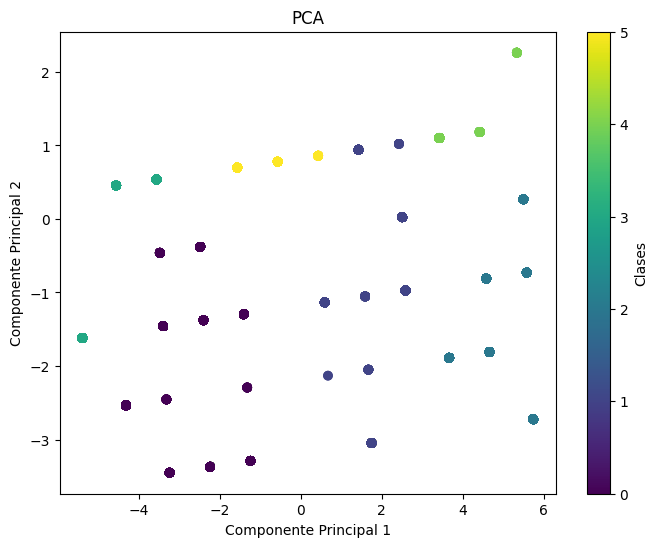

In [604]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_1_agglo.drop(columns='Cluster'))

# Crear un scatter plot de los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_1_agglo['Cluster'], cmap='viridis')

# Añadir leyenda y etiquetas
plt.colorbar(scatter, label='Clases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()

### Situación 2: Segmentación por Demografía y Comportamiento de Compra
Variables: `Edad_Rango` , `Estado_Civil`, `Sexo`, `Importe`, `Estado`

Objetivo: Encontrar segmentos de clientes basados en características demográficas combinadas con su comportamiento de compra. Esto puede ayudarte a entender cómo las características personales influyen en el comportamiento de compra.

#### Extraer y Agrupar datos

In [405]:
df_2= df.groupby(['Pedido','Edad_Rango', 'Estado_Civil','Sexo','Estado']).agg({
    'Importe': 'sum'
}).reset_index()

In [406]:
df_2.drop(columns=['Pedido'],inplace=True)

In [407]:
df_2_cluster = df_2.copy()

#### Scaler | Encoder

In [408]:
minmaxscaler = MinMaxScaler()
df_2_cluster['Importe'] = minmaxscaler.fit_transform(df_2['Importe'].values.reshape(-1,1))

In [409]:
lblencoder = LabelEncoder()
df_2_cluster['Estado_Civil'] = lblencoder.fit_transform(df_2['Estado_Civil'].values.reshape(-1))
df_2_cluster['Sexo'] = lblencoder.fit_transform(df_2['Sexo'].values.reshape(-1))
df_2_cluster['Edad_Rango'] = lblencoder.fit_transform(df_2['Edad_Rango'].values.reshape(-1))
df_2_cluster['Estado'] = lblencoder.fit_transform(df_2['Estado'].values.reshape(-1))

#### Elbow

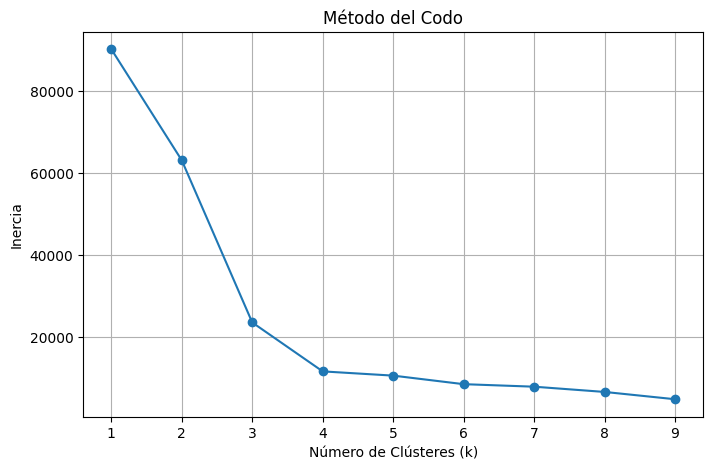

In [410]:
# rango de valores
k_range = range(1, 10)
inertia = []

# KMeans para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=1)
    kmeans.fit(df_2_cluster)
    inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [522]:
df_2_agglo = df_2_cluster.copy()

#### Clustering - Kmeans

In [523]:
# Aplicar K-means
kmeans = KMeans(n_clusters=4,random_state=3).fit(df_2_cluster)

# Añadir las etiquetas al DataFrame
df_2['Cluster'] = kmeans.labels_
df_2_cluster['Cluster'] = kmeans.labels_

#### Reducción de Dimensionalidad

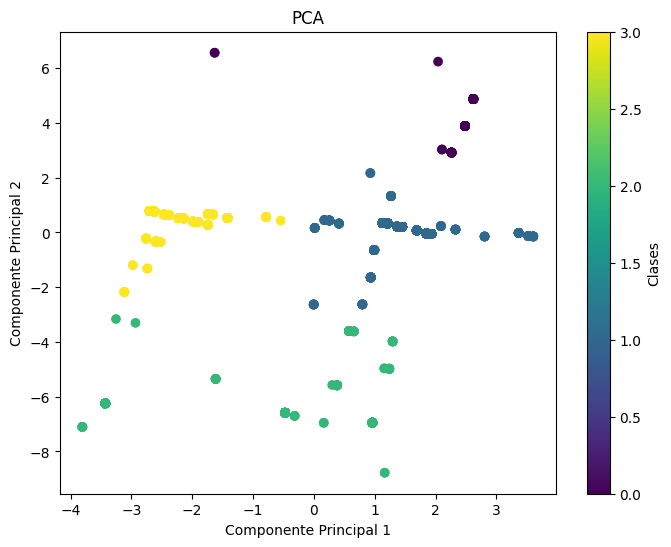

In [524]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_2_cluster.drop(columns=['Cluster']))

# Crear un scatter plot de los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_2_cluster['Cluster'], cmap='viridis')

# Añadir leyenda y etiquetas
plt.colorbar(scatter, label='Clases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()

#### Interpretación

In [525]:
impact = pd.DataFrame(pca.components_).T
impact.columns=['Impacto a Comp. 1','Impacto a Comp. 2']

features = pd.DataFrame(pca.feature_names_in_,columns=['Caracteristica'])

pd.concat([features,impact],axis=1)

,Caracteristica,Impacto a Comp. 1,Impacto a Comp. 2
0,Edad_Rango,0.239250,-0.127056
1,Estado_Civil,0.957626,-0.109350
2,Sexo,-0.081193,0.014630
3,Estado,0.138274,0.985741
4,Importe,-0.000573,-0.000329


Vemos que para el 
* `componente 1`: `Estado_Civil` impacta en un 0.957076 y `Edad_Rango` impacta en 0.239250
* `componente 2`: `Estado` impacta en un 0.985710	


In [526]:
cluster_summary = df_2.groupby('Cluster').agg({
    'Importe': 'mean',
    'Edad_Rango': lambda x: x.mode()[0],
    'Estado_Civil': lambda x: x.mode()[0],
    'Sexo': lambda x: x.mode()[0],
    'Estado': lambda x: x.mode()[0]
})
print(cluster_summary)

            Importe Edad_Rango Estado_Civil       Sexo      Estado
Cluster                                                           
0        220.659300       < 30      Soltero   Femenino      Sonora
1        295.394171    30 - 39      Soltero   Femenino  Nuevo Leon
2        445.582972    40 - 49      Soltero   Femenino    Coahuila
3        371.079504    30 - 39       Casado  Masculino  Nuevo Leon


El `cluster_summary` muestra la media del `Importe` y la `moda` de `Edad_Rango`, `Estado_Civil`, `Estado`, `Sexo` para cada clúster, teniendo en cuenta las variables de impacto para cada componente, llegamos a la siguiente conclusión:

- Los clientes de `Nuevo León`, en el `rango de edad 30 - 39`, que son `solteros y femeninos` tienen un importe de compra de `295.39`, dentro de este rango, aquellos que son `casados y masculinos` presentan el mayor gasto promedio, `371.08`.

- Los clientes en el `rango de edad 40 - 49 en Coahuila` tienen el siguiente importe promedio más alto, 445.58. Son `solteros y femeninos`.

- Los clientes en `Sonora`, `menores de 30 años`, tienen el `importe promedio más bajo, 220.66`. Son solteros y femeninos.

#### Clustering - AgglomerativeClustering

In [599]:
# Crear el modelo AgglomerativeClustering
aggcluster = AgglomerativeClustering(n_clusters=5)

# Ajustar el modelo a los datos
df_2_agglo['Cluster'] = aggcluster.fit_predict(df_2_agglo)

In [600]:
df_2_agglo['Cluster'].value_counts()

Cluster
1    4493
2    3853
0    2400
3     372
4     221
Name: count, dtype: int64

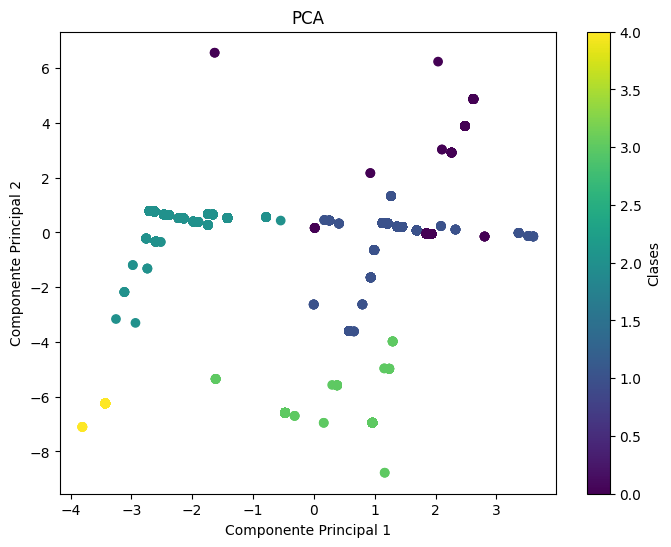

In [601]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_2_agglo.drop(columns='Cluster'))

# Crear un scatter plot de los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_2_agglo['Cluster'], cmap='viridis')

# Añadir leyenda y etiquetas
plt.colorbar(scatter, label='Clases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()

### Situación 3: Análisis de Clientes por Antigüedad y Experiencia:

Variables: `antiguedad`, `No._Hijos`, `Edad`, `Grupo`

Objetivo: Agrupar clientes según su antigüedad y número de hijos, junto con sus niveles de escolaridad y gasto. Esto puede ser útil para identificar patrones en clientes de diferentes etapas de vida.

#### Explorar los datos

In [415]:
df_3= df.groupby(['Pedido', 'Antiguedad', 'No._Hijos', 'Edad', 'Grupo']).agg({
    'Importe': 'sum'
}).reset_index()

In [416]:
df_3.drop(columns='Pedido',inplace=True)

In [417]:
df_3_cluster = df_3.copy()

#### Scaler | Encoder

In [418]:
minmax_scaler = MinMaxScaler()

df_3_cluster['Importe'] = minmax_scaler.fit_transform(df_3['Importe'].values.reshape(-1,1))
df_3_cluster['Edad'] = minmax_scaler.fit_transform(df_3['Edad'].values.reshape(-1,1))
df_3_cluster['Antiguedad'] = minmax_scaler.fit_transform(df_3['Antiguedad'].values.reshape(-1,1))

In [419]:
lblencoder = LabelEncoder()

df_3_cluster['Grupo'] = lblencoder.fit_transform(df_3['Grupo'].values.reshape(-1))
df_3_cluster['No._Hijos'] = lblencoder.fit_transform(df_3['No._Hijos'].values.reshape(-1))

#### Elbow

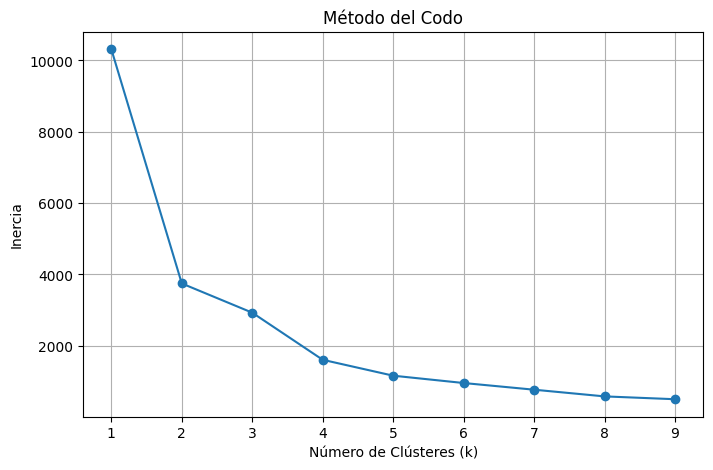

In [420]:
# rango de valores
k_range = range(1, 10)
inertia = []

# KMeans para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(df_3_cluster)
    inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [530]:
df_3_agglo = df_3_cluster.copy()

#### Clustering - Kmeans

In [531]:
# Aplicar K-means
kmeans = KMeans(n_clusters=3).fit(df_3_cluster)

# Añadir las etiquetas al DataFrame
df_3['Cluster'] = kmeans.labels_
df_3_cluster['Cluster'] = kmeans.labels_

In [532]:
df_3_cluster

,Antiguedad,No._Hijos,Edad,Grupo,Importe,Cluster
0,0.263158,0,0.300,1,0.006268,1
1,0.157895,0,0.400,2,0.004528,0
2,0.736842,3,0.625,2,0.007845,2
3,0.184211,0,0.375,1,0.005000,1
4,0.184211,0,0.375,1,0.002877,1
...,...,...,...,...,...,...
11334,0.078947,0,0.150,2,0.005326,0
11335,0.026316,0,0.275,2,0.053711,0
11336,0.000000,2,0.350,2,0.025608,2
11337,0.026316,0,0.275,2,0.001146,0


#### Reducción de Dimensionalidad

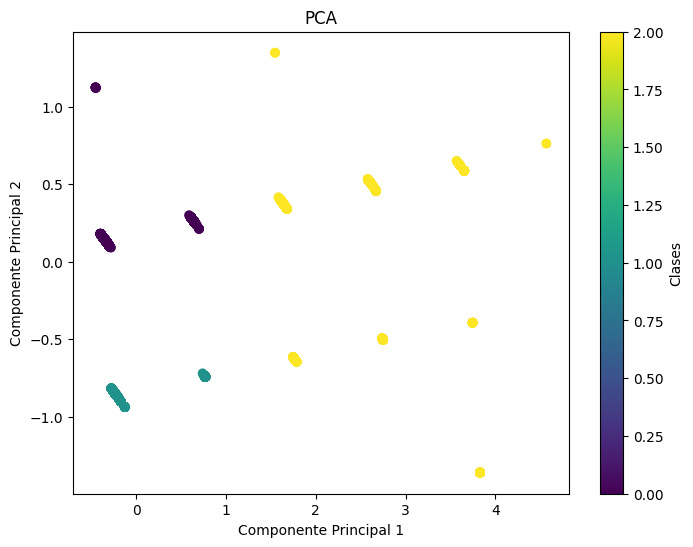

In [533]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_3_cluster.drop(columns=['Cluster']))

# Crear un scatter plot de los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_3_cluster['Cluster'], cmap='viridis')

# Añadir leyenda y etiquetas
plt.colorbar(scatter, label='Clases')
plt.xlabel('Componente Principal 1')
# plt.ylim(0,1000)
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()

#### Interpretación

In [534]:
impact = pd.DataFrame(pca.components_).T
impact.columns=['Impacto a Comp. 1','Impacto a Comp. 2']

features = pd.DataFrame(pca.feature_names_in_,columns=['Caracteristica'])

pd.concat([features,impact],axis=1)

,Caracteristica,Impacto a Comp. 1,Impacto a Comp. 2
0,Antiguedad,0.068974,-0.063252
1,No._Hijos,0.987127,0.120933
2,Edad,0.093287,-0.066557
3,Grupo,-0.110075,0.988400
4,Importe,0.001969,-0.003161


Vemos que para el 
* `componente 1`: `No._Hijos` impacta en un 0.987127
* `componente 2`: `Grupo` impacta en un 0.988400

In [535]:
cluster_summary = df_3.groupby('Cluster').agg({
    'Importe': 'mean',
    'Edad': 'mean',
    'Antiguedad': 'mean',
    'No._Hijos': lambda x: x.mode()[0],
    'Grupo': lambda x: x.mode()[0],
})

print(cluster_summary)

            Importe       Edad  Antiguedad  No._Hijos       Grupo
Cluster                                                          
0        285.825424  34.514168    6.731641          0   EMPLEADOS
1        407.236055  38.004014   10.001720          0  EJECUTIVOS
2        532.734382  44.480889   13.780444          2   EMPLEADOS


El `cluster_summary` muestra la media del `Importe`, `Edad` y `Antiguedad` y la moda de `No._Hijos`, `Grupo` para cada clúster, teniendo en cuenta las variables de impacto para cada componente, llegamos a la siguiente conclusión:

- `Empleados sin hijos` tienen un `importe promedio de 289.89`. Este grupo tiene una `edad promedio de 34.33` años y una antigüedad promedio de 6.60 años. Su gasto promedio es menor comparado con los otros clústeres.

- `Empleados con 2 hijos` muestran el `importe promedio más alto de 532.73`. Tienen una `edad promedio de 44.48 años` y una antigüedad promedio de 13.78 años. Este grupo presenta el mayor gasto promedio, lo que podría reflejar mayores responsabilidades y gastos asociados a la crianza de hijos.

- `Ejecutivos sin hijos` tienen un `importe promedio de 358.75`. Su `edad promedio es de 37.55 años` y su antigüedad promedio es de 9.46 años. Aunque no tienen hijos, el gasto de este grupo es considerablemente alto, similar al de los empleados con mayor antigüedad y responsabilidades.

#### Clustering - AgglomerativeClustering

In [596]:
# Crear el modelo AgglomerativeClustering
aggcluster = AgglomerativeClustering(n_clusters=5)

# Ajustar el modelo a los datos
df_3_agglo['Cluster'] = aggcluster.fit_predict(df_3_agglo)

In [597]:
df_3_agglo['Cluster'].value_counts()

Cluster
2    7742
1    1744
3     728
0     708
4     417
Name: count, dtype: int64

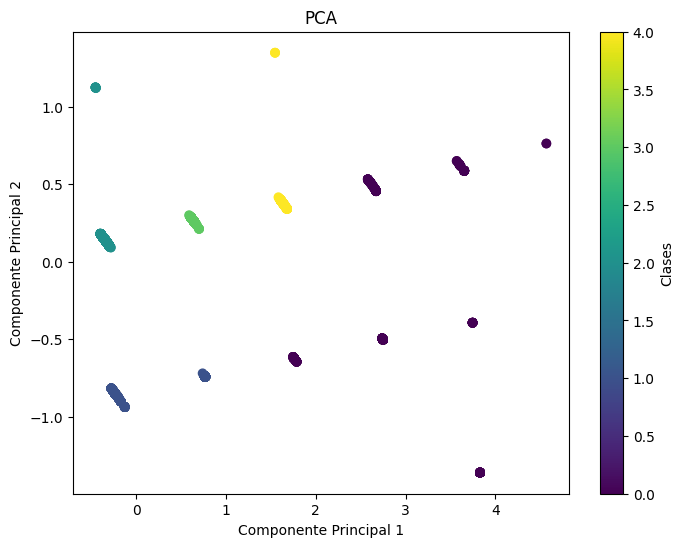

In [598]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_3_agglo.drop(columns='Cluster'))

# Crear un scatter plot de los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_3_agglo['Cluster'], cmap='viridis')

# Añadir leyenda y etiquetas
plt.colorbar(scatter, label='Clases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()

### Situación 4: Segmentación por Estado y Comportamiento de Compra

Variables: `Estado`, `Cantidad`, `Importe`,`mes`

Objetivo: Identificar cómo el estado geográfico afecta las compras. Esto puede ayudar a entender las variaciones regionales en el comportamiento de compra.

#### Explorar los datos

In [541]:
df_4 = df.groupby(['Pedido', 'Estado','mes']).agg({
    # 'Cantidad': 'sum',
    'Importe': 'sum'
}).reset_index()

In [542]:
df_4.drop(columns='Pedido',inplace=True)

In [543]:
df_4_cluster = df_4.copy()

#### Scaler | Encoder

In [544]:
minmax_scaler = MinMaxScaler()

df_4_cluster['Importe'] = minmax_scaler.fit_transform(df_4['Importe'].values.reshape(-1,1))

In [545]:
lblencoder = LabelEncoder()

df_4_cluster['Estado'] = lblencoder.fit_transform(df_4['Estado'].values.reshape(-1))

#### Elbow

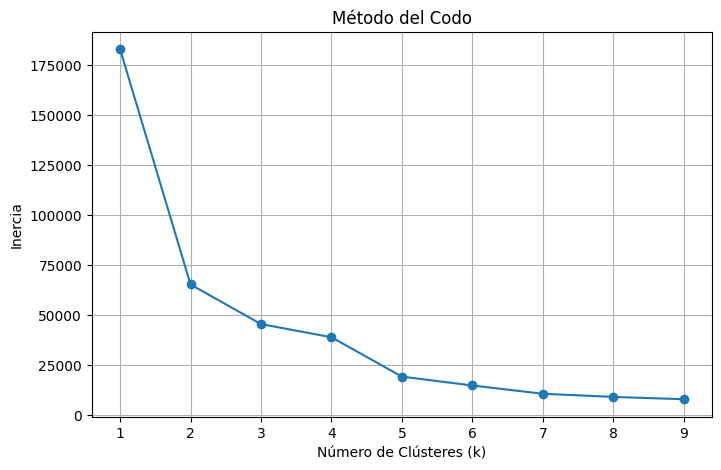

In [546]:
# rango de valores
k_range = range(1, 10)
inertia = []

# KMeans para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(df_4_cluster)
    inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [547]:
df_4_agglo = df_4_cluster.copy()

#### Clustering - Kmeans

In [548]:
# Aplicar K-means
kmeans = KMeans(n_clusters=5).fit(df_4_cluster)

# Añadir las etiquetas al DataFrame
df_4['Cluster'] = kmeans.labels_
df_4_cluster['Cluster'] = kmeans.labels_

#### Reducción de Dimensionalidad

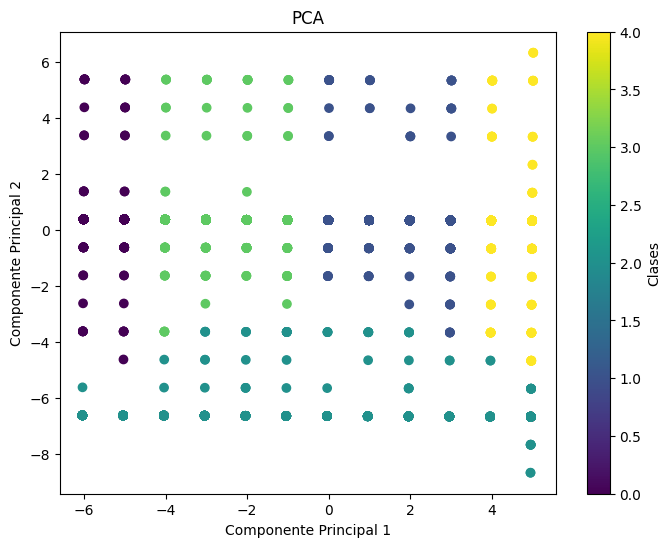

In [549]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_4_cluster.drop(columns=['Cluster']))

# Crear un scatter plot de los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_4_cluster['Cluster'], cmap='viridis')

# Añadir leyenda y etiquetas
plt.colorbar(scatter, label='Clases')
plt.xlabel('Componente Principal 1')
# plt.ylim(0,1000)
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()

#### Interpretación

In [550]:
impact = pd.DataFrame(pca.components_).T
impact.columns=['Impacto a Comp. 1','Impacto a Comp. 2']

features = pd.DataFrame(pca.feature_names_in_,columns=['Caracteristica'])

pd.concat([features,impact],axis=1)

,Caracteristica,Impacto a Comp. 1,Impacto a Comp. 2
0,Estado,0.004477,0.999990
1,mes,0.999990,-0.004476
2,Importe,0.000786,-0.000463


Vemos que para el 
* `componente 1`: `Estado` impacta en un 1.00
* `componente 2`: `Importe` impacta en un 1.00


In [551]:
cluster_summary = df_4.groupby('Cluster').agg({
    'Importe': 'mean',
    'mes': lambda x: x.mode()[0],
    'Estado': lambda x: x.mode()[0],
})
print(cluster_summary)

            Importe  mes      Estado
Cluster                             
0        225.046464    1  Nuevo Leon
1        240.930507   10  Nuevo Leon
2        440.687848   12    Coahuila
3        230.797648    6  Nuevo Leon
4        600.211089   12  Nuevo Leon


El `cluster_summary` muestra la media del `Importe` y la moda del `Estado` y `mes` para cada clúster, teniendo en cuenta las variables de impacto para cada componente, llegamos a la siguiente conclusión:

- El clúster con el mayor importe `(505.19)` corresponde a `Nuevo León en diciembre`.
- `Coahuila` también tiene un importe elevado `(440.69) en diciembre`.
- Los importes más bajos están en los clústeres de `Nuevo León`, específicamente en los `meses de enero, junio y octubre`.

#### Clustering - AgglomerativeClustering

In [593]:
# Crear el modelo AgglomerativeClustering
aggcluster = AgglomerativeClustering(n_clusters=7)

# Ajustar el modelo a los datos
df_4_agglo['Cluster'] = aggcluster.fit_predict(df_4_agglo)

In [594]:
df_4_agglo['Cluster'].value_counts()

Cluster
6    2558
2    2411
1    2327
3    1763
5    1622
0     435
4     223
Name: count, dtype: int64

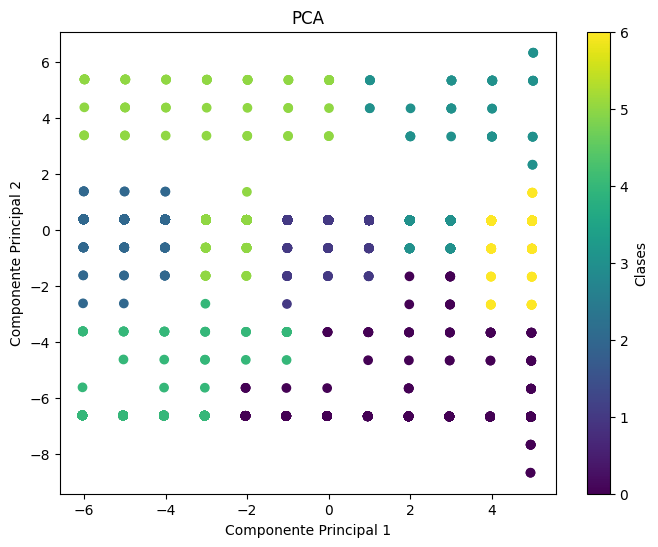

In [595]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_4_agglo.drop(columns='Cluster'))

# Crear un scatter plot de los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_4_agglo['Cluster'], cmap='viridis')

# Añadir leyenda y etiquetas
plt.colorbar(scatter, label='Clases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()

### Situación 5: Análisis de Día de la Semana en relación con las Ventas

Variables: `Pedido`, `dia`, `Importe`, `Rango_Edad`

Objetivo: Identificar patrones de ventas según la fecha para determinar cuáles son los meses o días con mayores pedidos e importes. Esto puede ayudarte a detectar temporadas altas y bajas de ventas.


#### Extraer y Agrupar datos

In [557]:
df_5 = df.groupby(['Pedido','dia','Estado','Edad_Rango']).agg({
    # 'Cantidad':'sum',
    # Estado_Civil
    'Importe':'sum'
    }).reset_index()

In [558]:
df_5.drop(columns='Pedido',inplace=True)

In [559]:
df_5_cluster = df_5.copy()

#### Scaler | Encoder

In [560]:
minmaxescaler = MinMaxScaler()

df_5_cluster['Importe'] = minmaxescaler.fit_transform(df_5['Importe'].values.reshape(-1,1))
# df_5_cluster['Cantidad'] = minmaxescaler.fit_transform(df_5['Cantidad'].values.reshape(-1,1))
# df_5_cluster['Edad'] = minmaxescaler.fit_transform(df_5['Edad'].values.reshape(-1,1))

In [561]:
lblencoder = LabelEncoder()

# df_5_cluster['anio'] = lblencoder.fit_transform(df_5['anio'].values.reshape(-1))
df_5_cluster['Estado'] = lblencoder.fit_transform(df_5['Estado'].values.reshape(-1))
df_5_cluster['Edad_Rango'] = lblencoder.fit_transform(df_5['Edad_Rango'].values.reshape(-1))
# df_5_cluster['mes'] = lblencoder.fit_transform(df_5['mes'].values.reshape(-1))
# df_5_cluster['Estado_Civil'] = lblencoder.fit_transform(df_5['Estado_Civil'].values.reshape(-1))

# Estado_Civil

#### Elbow

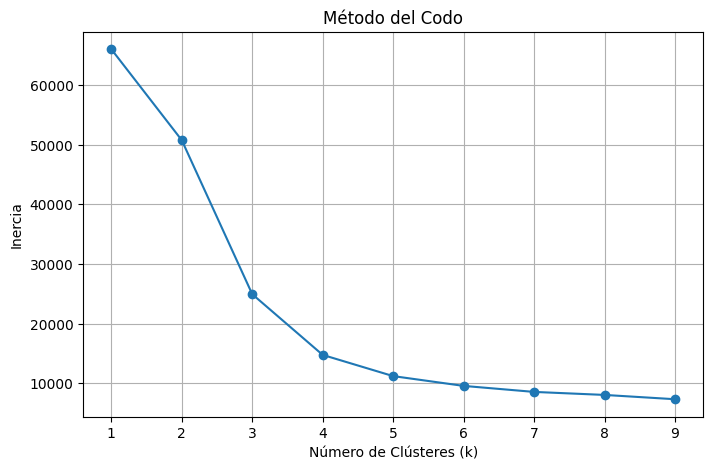

In [562]:
# rango de valores
k_range = range(1, 10)
inertia = []

# KMeans para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(df_5_cluster)
    inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#### Clustering

In [585]:
# Aplicar K-means
kmeans = KMeans(n_clusters=5).fit(df_5_cluster)

# Añadir las etiquetas al DataFrame
df_5['Cluster'] = kmeans.labels_
df_5_cluster['Cluster'] = kmeans.labels_

#### Reducción de Dimensionalidad

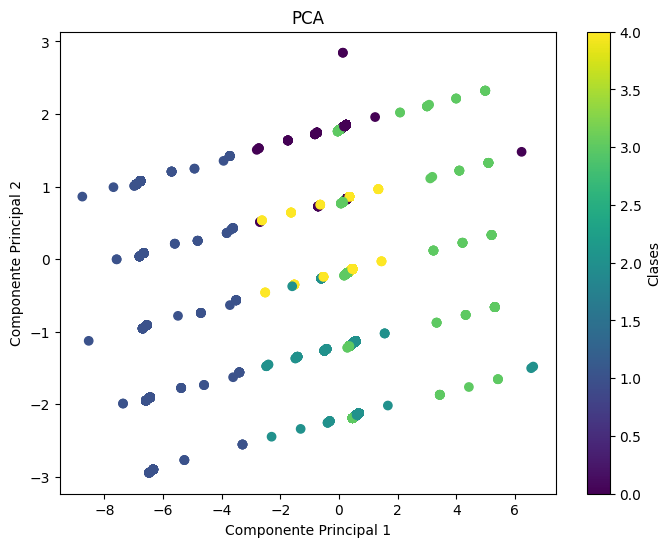

In [586]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_5_cluster.drop(columns=['Cluster']))

# Crear un scatter plot de los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_5_cluster['Cluster'], cmap='viridis')

# Añadir leyenda y etiquetas
plt.colorbar(scatter, label='Clases')
plt.xlabel('Componente Principal 1')
# plt.ylim(0,1000)
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()

In [587]:
df_5_agglo = df_5_cluster.copy()

#### Interpretación

In [588]:
impact = pd.DataFrame(pca.components_).T
impact.columns=['Impacto a Comp. 1','Impacto a Comp. 2']

features = pd.DataFrame(pca.feature_names_in_,columns=['Caracteristica'])

pd.concat([features,impact],axis=1)

,Caracteristica,Impacto a Comp. 1,Impacto a Comp. 2
0,dia,-0.108729,0.993965
1,Estado,0.991569,0.107408
2,Edad_Rango,-0.070492,-0.022275
3,Importe,-0.000407,-0.000291


Vemos que para el 
* `componente 1`: `dia` impacta en un 0.832110
* `componente 2`: `dia` impacta en un 0.554600 y `Estado` impacta en un 0.830146

In [589]:
cluster_summary = df_5.groupby('Cluster').agg({
    # 'Cantidad': 'mean',
    'Importe': 'mean',
    'dia': lambda x: x.mode()[0],
    'Estado': lambda x: x.mode()[0],
    # 'Estado_Civil': lambda x: x.mode()[0],
    'Edad_Rango': lambda x: x.mode()[0]
})
print(cluster_summary)

            Importe  dia      Estado Edad_Rango
Cluster                                        
0        364.762143    4  Nuevo Leon    30 - 39
1        445.582972    4    Coahuila    40 - 49
2        362.689967    1  Nuevo Leon    30 - 39
3        275.002620    2  Nuevo Leon       < 30
4        285.974098    2  Nuevo Leon    30 - 39


El `cluster_summary` muestra la media del `Importe`, `Edad` y `Antiguedad` y la moda de `No._Hijos`, `Grupo` para cada clúster, teniendo en cuenta las variables de impacto para cada componente, llegamos a la siguiente conclusión:

- `Nuevo León (30 - 39 años, día 4)`: Los clientes en este grupo tienen un `importe promedio de 327.35`, lo que refleja un gasto moderado en comparación con otros grupos del mismo estado.

- `Nuevo León (< 30 años, día 2)`: Los clientes más jóvenes, menores de 30 años, tienen un `importe promedio de 286.90`, que es el más bajo entre los grupos, sugiriendo un menor poder adquisitivo o gasto en este grupo.

- `Coahuila (40 - 49 años, día 4)`: Este grupo tiene el `importe promedio más alto, 447.60`, destacando un mayor gasto entre los clientes de mayor edad en Coahuila.

- `Nuevo León (30 - 39 años, día 1)`: Los clientes en este grupo tienen un `importe promedio de 337.28`, ligeramente superior al grupo del mismo estado y rango de edad pero en día 4, lo que podría sugerir variaciones en el gasto según el día.

#### Clustering - AgglomerativeClustering

In [590]:
# Crear el modelo AgglomerativeClustering
aggcluster = AgglomerativeClustering(n_clusters=3)

# Ajustar el modelo a los datos
df_5_agglo['Cluster'] = aggcluster.fit_predict(df_5_agglo)

In [591]:
df_5_agglo['Cluster'].value_counts()

Cluster
0    8436
1    2257
2     646
Name: count, dtype: int64

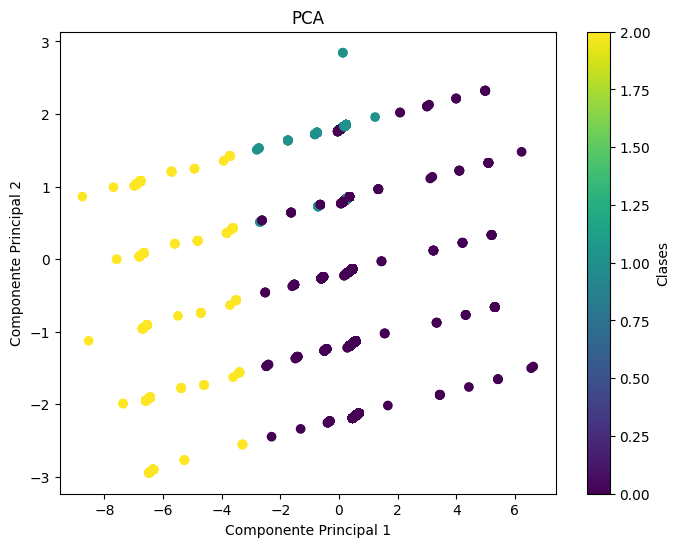

In [592]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_5_agglo.drop(columns='Cluster'))

# Crear un scatter plot de los datos reducidos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_5_agglo['Cluster'], cmap='viridis')

# Añadir leyenda y etiquetas
plt.colorbar(scatter, label='Clases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA')
plt.show()